# Générateur aléatoires

L'objectif, c'est de transformer ce qui suit en réalité :

Quand le rapport a une base constante et une partie variable qui peut être représentée à l'aide d'une distribution normale :
* $ie_{\text{wn}} = ie(1 + \mathcal{N}(0.5, \sigma^2))$  ⚪ `'e_wn'` ⚪ `'SiteEnergyUseWN(kBtu)'`
* $ies = ie(1 + (1/3)\mathcal{N}(3.14, 2.19.10^{-5}) + (2/3)\mathcal{N}(2.25, 0.3136))$  ⚪ `'es'` ⚪ `'SourceEUI(kBtu/sf)'`
* $ies_{\text{wn}}$ ...


Random samples from $\mathcal{N}(\mu,\sigma^2)$ : 

https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.standard_normal.html#numpy.random.RandomState.standard_normal

        mu + sigma * np.random.standard_normal(size=...)
        np.random.normal(mu, sigma, size=...)

count   : 3000
median  : 3.1397524634452765
mean    : 3.13980004815341
std     : 0.004546163403187354


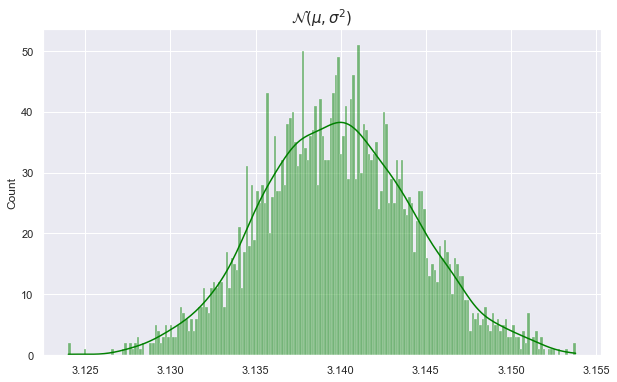

count   : 3000
median  : 2.274875905981752
mean    : 3.13980004815341
std     : 0.5608079105680883


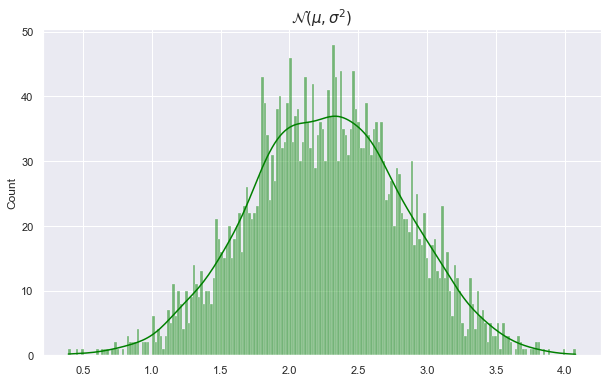

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize': (10, 6)})
import matplotlib.pyplot as plt

# générer la fonction sur un intervalle
from pepper_commons import *
import numpy as np
from numpy.random import default_rng
rng = default_rng()


    

mu = 3.1398009039528434
sigma = 0.004679081434464869
#simul = mu + sigma * rng.standard_normal(size=3000)
simul = rng.normal(mu, sigma, size=3000)

print(bold('count'), '  :', len(simul))
print(bold('median'), ' :', np.median(simul))
print(bold('mean'), '   :', np.mean(simul))
#print(bold('modes'), '  :', list(simul.mode()))
print(bold('std'), '    :', np.std(simul))
#print(bold('kurt'), '   :', simul.kurtosis())

sns.histplot(data=simul, kde=True, bins=200, color='green')
plt.title(r'$\mathcal{N}(\mu,\sigma^2)$', size=15)
plt.show()


mu_2 = 2.2596488355852267
sigma_2 = 0.559539618672871
simul_2 = mu_2 + sigma_2 * rng.standard_normal(size=3000)

print(bold('count'), '  :', len(simul_2))
print(bold('median'), ' :', np.median(simul_2))
print(bold('mean'), '   :', np.mean(simul))
#print(bold('modes'), '  :', list(simul_2.mode()))
print(bold('std'), '    :', np.std(simul_2))
#print(bold('kurt'), '   :', simul_2.kurtosis())

sns.histplot(data=simul_2, kde=True, bins=200, color='green')
plt.title(r'$\mathcal{N}(\mu,\sigma^2)$', size=15)
plt.show()

# mix des deux, avec 1/3 du premier et 2/3 du second
# c'est l'heure ... mais 2 méthode : coupler avec un rand pile ou face réglé aux probas et utiliser l'une ou l'autre
# ou tirer un tiers avec l'un, deux tiers avec l'autre, union, shuffle : je peux faire les deux et comparer les perfs


#plt.xlim(0, 2)

# le but est de reproduire ies

# afficher l'histogramme

#ok, ko = assert_const_ratio(re, 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)')

count   : 3207
median  : 2.705991743976938
mean    : 2.583293500217804
std     : 0.6168805907067737


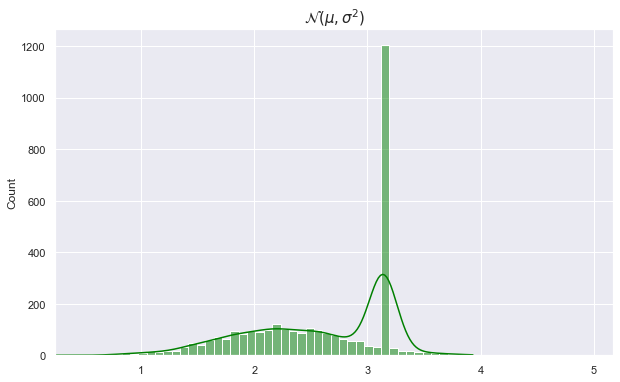

In [ ]:
def simul_analyse_histo_1(mss_list):
    mss_list = [{'loc': mss['mu'], 'scale': mss['sigma'], 'size': mss['size']} for mss in mss_list]
    simul = []
    for mss in mss_list:
        simul += list(rng.normal(**mss))
    np.random.shuffle(simul)
    m = np.median(simul)
    s = np.std(simul)
    print(bold('count'), '  :', len(simul))
    print(bold('median'), ' :', m)
    print(bold('mean'), '   :', np.mean(simul))
    #print(bold('modes'), '  :', list(simul.mode()))
    print(bold('std'), '    :', s)
    #print(bold('kurt'), '   :', simul.kurtosis())
    sns.histplot(data=simul, kde=True, bins=50, color='green')
    plt.xlim(m - 4 * s, m + 4 * s)
    plt.title(r'$\mathcal{N}(\mu,\sigma^2)$', size=15)
    plt.show()


# reproduction simulée de ratio_histo(ok.ratio, 'SourceEUI', 'SiteEUI')
mss_list = [
    {'mu': 3.1398009039528434, 'sigma': 0.004679081434464869, 'size': 1180},
    {'mu': 2.2596488355852267, 'sigma': 0.559539618672871, 'size': 2027}
]
simul_analyse_histo_1(mss_list)

In [ ]:
# reproduction 'SiteEUI(kBtu/sf) relevée vs. calculée' => il faudrait commencer par terminer le trav de separation
mss_list = [
    {'mu': .., 'sigma': .., 'size': ..},
    {'mu': .., 'sigma': .., 'size': ..}
]
simul_analyse_histo_1(mss_list)

# Simulation de l'effet de troncature

C'est finalement une source principale des erreurs observées sur les données dans le cadre des analyses exploratoires uni et bivariées.

L'objectif ici est de mieux qualifier et quantifier ce phénomène apparenté à du bruit, en vue de mieux l'éliminer.